In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Handle categorical variables

In [5]:
df['EngagementStatus'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)


In [7]:
df['GenderStatus'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0) #1:female, 0:male

categorical_features.append('GenderStatus')

# Handling continuous variables

In [8]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

# Categorical variables and Continuous variables

In [9]:
all_features = continuous_features + categorical_features
response = 'EngagementStatus'
sample_df = df[all_features + [response]]

sample_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,GenderStatus,EngagementStatus
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


# Build predictive model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [12]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [13]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
rf_model.estimators_[0] # the first tree in Rondam Forest

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1671511233, splitter='best')

In [61]:
rf_model.estimators_[0].predict(x_test) # use first tree to predict whether a customer is going to respond

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# to know every features importances
rf_model.feature_importances_

feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.283185,EmploymentStatus.Retired
1,0.096649,Income
7,0.072401,Total Claim Amount
0,0.060180,Customer Lifetime Value
4,0.053655,Months Since Policy Inception
2,0.052890,Monthly Premium Auto
34,0.042841,EmploymentStatus.Employed
38,0.035603,Marital.Status.Divorced
8,0.034086,Sales.Channel.Agent
37,0.032119,EmploymentStatus.Unemployed


<font color=black size=5>*the EmploymentStatus.Retired feature seems to be the most important factor in making the final prediction and the Income, Total.Claim.Amount, and Customer.Lifetime.Value features follow as the second, third, and fourth most important features.*</font>





# Evaluating a classification model

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [63]:
# prediction
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [20]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))
print('---------------------------------------------------------------------------')
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
print('---------------------------------------------------------------------------')
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8797
Out-of-Sample Accuracy: 0.8690
---------------------------------------------------------------------------
In-Sample Precision: 0.9922
Out-of-Sample Precision: 0.9091
---------------------------------------------------------------------------
In-Sample Recall: 0.1419
Out-of-Sample Recall: 0.1453


In [28]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]
print(in_sample_preds)
print('---------------------------------------------------------------------------')
print(out_sample_preds)

[0.30610528 0.12895375 0.13588358 ... 0.12600157 0.12069882 0.11747452]
---------------------------------------------------------------------------
[0.12407627 0.10490481 0.18125535 ... 0.15201935 0.09257158 0.14378843]


<font color=black size=5>*the output of the predict_proba function has two columns, where the first column represents the predicted probability of a negative class, meaning no response for each record, and the second column represents the predicted probability of a positive class, meaning a response for each record.*</font>




In [33]:
# compute the ROC curve
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

<font color=black size=5>*The fpr values represent the false positive rates for each given threshold and the tpr values represent the true positive rates for each given threshold. The thresholds values represent the actual thresholds at which fpr and tpr are measured.*</font>





In [34]:
# compute the AUC
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8815
Out-Sample AUC: 0.8395


<font color=black size=5>*If you see a big gap between these two numbers, it is a sign of overfitting and you should try to address it by pruning the trees in the forest by tuning the hyperparameters, such as the maximum depth and minimum number of samples to split.*</font>




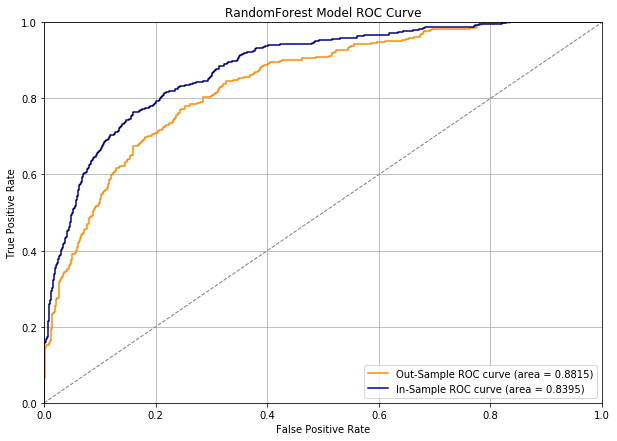

In [52]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') #benckmark
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

<font color=black size=5>*The larger the gap between the in- sample ROC curve and the out-of-sample ROC curve, the more the model is overfitting to the train set and fails to generalize the findings for unforeseen data.*</font>


